In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

from matplotlib import pyplot as plt
import matplotlib 

%matplotlib inline
#%config InlineBackend.figure_format = 'retina'

In [2]:
from distgen.generator import Generator

Distribution format: gpt
Output file: gpt.particles.gdf

Creating beam distribution....
   Beam starting from: cathode
   Total charge: 1 nC.
   Number of macroparticles: 20000.
   Assuming cylindrical symmetry...
   r distribution: SuperGaussianRad
      lambda = 5.65685 mm, power = INF
   theta distribution: uniform theta
      min_theta = 0 rad, max_theta = 6.28319 rad
   t distribution: Super Gaussian
      sigma_t = 25 ps, power = INF
   px distribution: Gaussian
      avg_px = 0 eV/c, sigma_px = 276.857 eV/c
   py distribution: Gaussian
      avg_py = 0 eV/c, sigma_py = 276.857 eV/c
   pz distribution: Gaussian
      avg_pz = 0 eV/c, sigma_pz = 276.857 eV/c
   Shifting avg_x = -0.000682859 mm -> 0 mm
   Scaling sigma_x = 3.99985 mm -> 4 mm
   Shifting avg_y = -0.000113737 mm -> 0 mm
   Scaling sigma_y = 4.00055 mm -> 4 mm
   Shifting avg_px = -0.171177 eV/c -> 0 eV/c
   Scaling sigma_px = 276.831 eV/c -> 276.857 eV/c
   Shifting avg_py = -0.238134 eV/c -> 0 eV/c
   Scaling sigma_

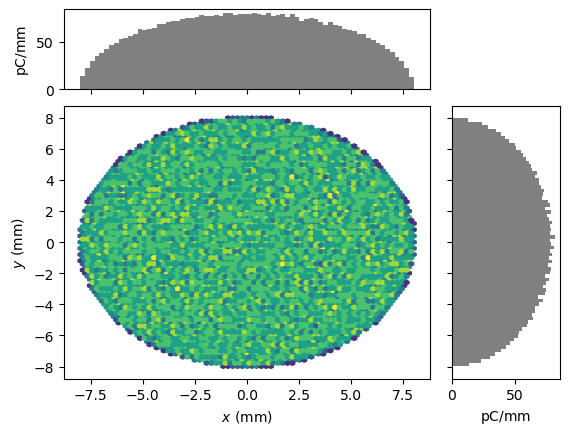

In [3]:
gen = Generator('templates/cu_injector/distgen.in.yaml', verbose=True)
gen.run()
gen.particles.plot('x', 'y')

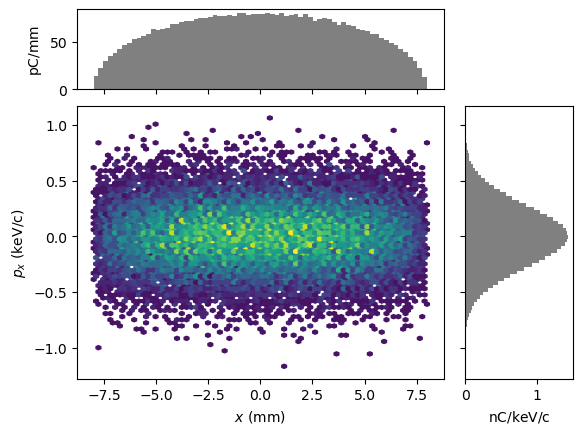

In [4]:
gen.particles.plot('x', 'px')

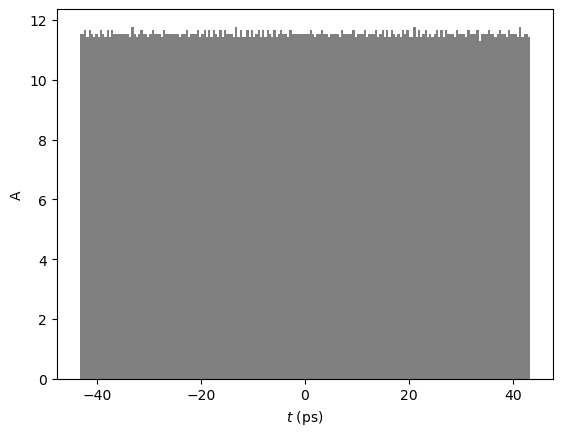

In [5]:
gen.particles.plot('t')

# Run with Distgen

In [6]:
from gpt.gpt_distgen import run_gpt_with_distgen

In [7]:
settings={'n_particle':200, 
          'r_dist:sigma_xy:value':3,
          'Ntout':500,
          'gun_voltage':400,
          'buncher_voltage':50,
          'phiCTB01_off':-90, 
          'cavity_1_voltage':1000,
          'cavity_2_voltage':1000,
          'cavity_3_voltage':1000,
          'cavity_4_voltage':1000,
          'cavity_5_voltage':1000,
          'A3Quad_1_current':3,
          'A3Quad_2_current':-3,
          'A3Quad_3_current':3
         }

G = run_gpt_with_distgen(settings,
                         gpt_input_file='templates/cu_injector/gpt.in',
                         distgen_input_file='templates/cu_injector/distgen.in.yaml',
                         verbose=True,
                         auto_phase=True,)
                         #workdir='templates/cu_injector/temp',
                         #use_tempdir=False)

print(G)

Run GPT with Distgen:
Replacing param n_particle with value 200
Replacing param r_dist:sigma_xy:value with value 3
Ntout is in gpt
gun_voltage is in gpt
buncher_voltage is in gpt
phiCTB01_off is in gpt
cavity_1_voltage is in gpt
cavity_2_voltage is in gpt
cavity_3_voltage is in gpt
cavity_4_voltage is in gpt
cavity_5_voltage is in gpt
A3Quad_1_current is in gpt
A3Quad_2_current is in gpt
A3Quad_3_current is in gpt
Linking particle files, distgen output will point to -> "gpt_particles.gdf" in working directory.
Replacing Distgen output params

Distgen >------

Distribution format: gpt
Output file: /var/folders/jf/c053b9m10035hkwq4wd3bzhr0000gn/T/tmprj3_0t4k/gpt_particles.gdf

Creating beam distribution....
   Beam starting from: cathode
   Total charge: 1 nC.
   Number of macroparticles: 200.
   Assuming cylindrical symmetry...
   r distribution: SuperGaussianRad
      lambda = 4.24264 mm, power = INF
   theta distribution: uniform theta
      min_theta = 0 rad, max_theta = 6.28319 rad


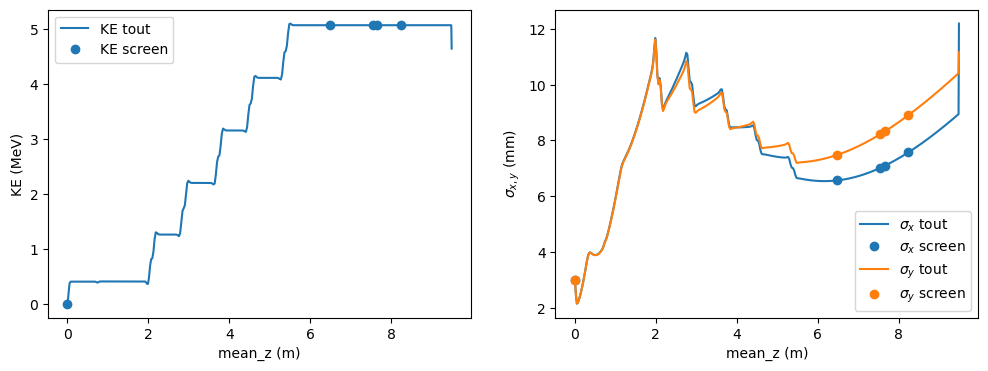

In [8]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

tzs = G.stat('mean_z','tout')
tstdx = G.stat('sigma_x','tout')
tstdy = G.stat('sigma_y','tout')
tKE = G.stat('mean_kinetic_energy','tout')

pzs = G.stat('mean_z','screen')
pstdx = G.stat('sigma_x','screen')
pstdy = G.stat('sigma_y','screen')
pKE = G.stat('mean_kinetic_energy','screen')

ax[0].plot(tzs, tKE/1e6, pzs, pKE/1e6, 'o', color='#1f77b4')
ax[0].set_xlabel('mean_z (m)');
ax[0].set_ylabel('KE (MeV)');
ax[0].legend(['KE tout','KE screen'])

ax[1].plot(tzs, tstdx*1e3, pzs, pstdx*1e3, 'o', color='#1f77b4')
ax[1].plot(tzs, tstdy*1e3, pzs, pstdy*1e3, 'o', color='#ff7f0e')         
ax[1].set_xlabel('mean_z (m)');
ax[1].set_ylabel('$\sigma_{x,y}$ (mm)');
ax[1].legend(['$\sigma_x$ tout','$\sigma_x$ screen','$\sigma_y$ tout','$\sigma_y$ screen']);

In [9]:
from gpt.gpt_distgen import evaluate_gpt_with_distgen

result = evaluate_gpt_with_distgen(settings=settings,
                                   gpt_input_file='templates/cu_injector/gpt.in',
                                   distgen_input_file='templates/cu_injector/distgen.in.yaml',
                                   verbose=True,
                                   auto_phase=True)

Run GPT with Distgen:
Replacing param n_particle with value 200
Replacing param r_dist:sigma_xy:value with value 3
Ntout is in gpt
gun_voltage is in gpt
buncher_voltage is in gpt
phiCTB01_off is in gpt
cavity_1_voltage is in gpt
cavity_2_voltage is in gpt
cavity_3_voltage is in gpt
cavity_4_voltage is in gpt
cavity_5_voltage is in gpt
A3Quad_1_current is in gpt
A3Quad_2_current is in gpt
A3Quad_3_current is in gpt
Linking particle files, distgen output will point to -> "gpt_particles.gdf" in working directory.
Replacing Distgen output params

Distgen >------

Distribution format: gpt
Output file: /var/folders/jf/c053b9m10035hkwq4wd3bzhr0000gn/T/tmpm7htxsu5/gpt_particles.gdf

Creating beam distribution....
   Beam starting from: cathode
   Total charge: 1 nC.
   Number of macroparticles: 200.
   Assuming cylindrical symmetry...
   r distribution: SuperGaussianRad
      lambda = 4.24264 mm, power = INF
   theta distribution: uniform theta
      min_theta = 0 rad, max_theta = 6.28319 rad


In [10]:
result

{'error': False,
 'end_n_particle': 200,
 'end_norm_emit_x': 0.00012990352814864727,
 'end_norm_emit_y': 0.0001418470785700194,
 'end_higher_order_energy_spread': 39927.07081788624,
 'end_mean_x': -2.986733662717944e-05,
 'end_sigma_x': 0.007574138680644955,
 'end_min_x': -0.018579585319341785,
 'end_max_x': 0.019108672273047706,
 'end_mean_y': 3.444716921128488e-05,
 'end_sigma_y': 0.008900451355476074,
 'end_min_y': -0.022758401633719075,
 'end_max_y': 0.022913468987582696,
 'end_mean_z': 8.227999999999996,
 'end_sigma_z': 3.674955604818067e-15,
 'end_min_z': 8.227999999999998,
 'end_max_z': 8.228000000000002,
 'end_mean_r': 0.009728720639615709,
 'end_sigma_r': 0.006476085582079434,
 'end_min_r': 0.00016917667753443282,
 'end_max_r': 0.026237485211055983,
 'end_mean_theta': 0.0009727037350621868,
 'end_sigma_theta': 1.780988024134729,
 'end_min_theta': -3.125552772634328,
 'end_max_theta': 3.1207226563822594,
 'end_mean_px': -17.67809884236397,
 'end_sigma_px': 10061.055464924466,
 

In [11]:
print(gen)

<disgten.Generator with input: 
n_particle: 20000
output:
  file: gpt.particles.gdf
  type: gpt
r_dist:
  alpha:
    units: dimensionless
    value: 0.0
  sigma_xy:
    units: millimeter
    value: 4.0
  type: rsg
random_type: hammersley
start:
  MTE:
    units: millielectron_volt
    value: 150.0
  type: cathode
t_dist:
  alpha:
    units: dimensionless
    value: 0.0
  sigma_t:
    units: picosecond
    value: 25.0
  type: sg
total_charge:
  units: nanocoulomb
  value: 1.0
transforms: null

>
